In [ ]:
import cv2
import numpy as np
import IPython.display as dp
import time

from google.colab.patches import cv2_imshow

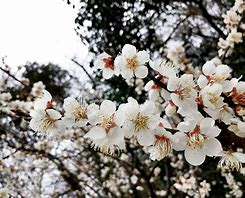

In [ ]:
# 1 = 一般不包含透明度  -1 = 完整包含透明度  0 = 灰階

img = cv2.imread('梅花.jpg', 1)

#儲存圖片 cv2.imwrite(圖片路徑, 圖片變數, 設定參數)

cv2.imwrite('壓縮梅花.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 0])

#圖片格式 PNG 支援透明色 陣列的第三維的第四個值會當作透明色值

#     JPG 不支援透明色，但可調整壓縮率，加在 設定參數 上：[ cv2.IMWRITE_JPEG_QUALITY, 畫質比率]

cv2_imshow(img)

In [ ]:
# 變數 np.full((高, 寬, 3), 初始顏色值, 色彩空間8bit)

img = np.full((300, 300, 3), 128, np.uint8)

# 建立儲存控制變數 cv2.VideoWriter(檔案路徑, 格式, 每秒影格數, 大小)

vid = cv2.VideoWriter('1.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (300, 300))

for x in range(int(img.shape[1]/3*2)):

  img = np.full((300, 300, 3), 128, np.uint8)

  start = (x, int(img.shape[1]/3))
  end = (int(img.shape[1]/3)+x, int(img.shape[1]/3*2))
  color = (255, 0, 0)

  img = cv2.rectangle(img, start, end, color, -1)

  dp.clear_output(True)

  vid.write(img)

# 釋放控制變數

vid.release()

In [ ]:
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 # 進行轉碼和壓縮的命令

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# 在瀏覽器上播放

import codecs, base64

with codecs.open('2.mp4', 'rb') as f :
  
  d = base64.b64encode(f.read()).decode()
 
dp.HTML(f'<video src="data:video/mp4;base64,{d}" controls />')